# Linear regression
Example showing Linear regression written in python using SciKit Learn (sklearn).

Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import r2_score

Define constants used:

In [2]:
FILENAME = 'data/company_data.csv'
PLOT1 = 'raw_dat1.png'
PLOT2 = 'best_fit1.png'

Read file and display first five records:

In [3]:
df = pd.read_csv(FILENAME)
df.head()

,BestEstimateEmployees,BestEstimateTurnover,Latitude,Longitude
0,27,3160000,50.39,-4.02
1,12,230000,50.44,-3.56
2,69,4799228,50.49,-3.55
3,4,1985000,50.53,-3.60
4,1,190000,50.55,-4.44


Edit file to delete variables not needed later:

In [4]:
del df['Latitude']
del df['Longitude']
df.head()

,BestEstimateEmployees,BestEstimateTurnover
0,27,3160000
1,12,230000
2,69,4799228
3,4,1985000
4,1,190000


Clean file - remove rows with missing values:

In [5]:
df.dropna()

,BestEstimateEmployees,BestEstimateTurnover
0,27,3160000
1,12,230000
2,69,4799228
3,4,1985000
4,1,190000
...,...,...
307,29,5695000
308,16,2395000
309,35,5460000
310,25,300000


Cast data as a Numpy array and plot data before processing:  

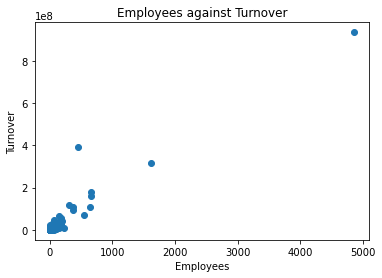

In [6]:
fig, ax = plt.subplots()
#need to cast data as a numpy array for later.  
#the plot works without doing this because the data is automatically converted to a 
#numpy array in matplotlib
x = np.array(df.drop('BestEstimateTurnover',axis=1))   
y = np.array(df['BestEstimateTurnover'])
ax.set_xlabel('Employees')
ax.set_ylabel('Turnover')
ax.set_title('Employees against Turnover')
ax.scatter(x, y)
fig.savefig(PLOT1)

Use standard SKLEARN functionality to split the data into a test and training data set:

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = False)

Create a linear regression model and train the model using the training sets:

In [8]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

Make predictions using the testing set and assess accuracy of predictions:

In [9]:
y_pred = regr.predict(x_test)

# The gradient and intercept of the slope.  Gradient is first item in coefficent list.
gradient = regr.coef_[0]
print(f"The offset is {regr.intercept_:,.0f} and the gradient of the slope is {gradient:,.0f}")

# The coefficient of determination
print(f"The coefficient of determination, a measure of the fit is: {r2_score(y_test, y_pred):.2f}")
print("1 is perfect prediction")

The offset is 1,498,408 and the gradient of the slope is 199,166
The coefficient of determination, a measure of the fit is: 0.79
1 is perfect prediction


Plot the calculated regression line against the test data: 

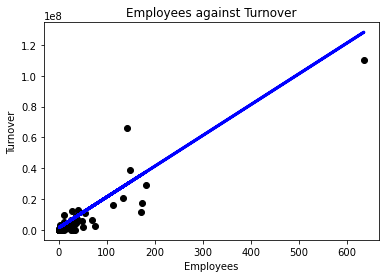

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('Employees')
ax.set_ylabel('Turnover')
ax.set_title('Employees against Turnover')
ax.scatter(x_test, y_test, color="black")
ax.plot(x_test, y_pred, color="blue", linewidth=3)
fig.savefig(PLOT2)